### Problem Statement 16: (Gap in number of beds)
Visually represent the difference between the expected number of hospital beds and the available number of hospital beds in each State/UT, as well as at the national level (if any).

In [34]:
import pandas as pd
all_hosp=pd.read_csv("clean_data/all_hospitals.csv")
all_hosp.head()


,State/UT,Number of Primary Health Centers,Community Health Centers,Sub-District/Divisional Hospitals,District Hospitals,Hospitals,HospitalBeds
0,Andaman and Nicobar Islands,27,4,NaN,3,34,1246
1,Andhra Pradesh,1417,198,31,20,1666,60799
2,Arunachal Pradesh,122,62,NaN,15,199,2320
3,Assam,1007,166,14,33,1220,19115
4,Bihar,2007,63,33,43,2146,17796


In [35]:
population = pd.read_csv("clean_data/census.csv", usecols = ["State/UT", "Population"])

population.head()

,State/UT,Population
0,Jammu and Kashmir,870354.0
1,Jammu and Kashmir,753745.0
2,Laddakh,133487.0
3,Laddakh,140802.0
4,Jammu and Kashmir,476835.0


In [36]:
population = population.groupby(by="State/UT").sum().reset_index()
population.head()

,State/UT,Population
0,Andaman and Nicobar Islands,380581.0
1,Andhra Pradesh,49386799.0
2,Arunachal Pradesh,1383727.0
3,Assam,31205576.0
4,Bihar,104099452.0


In [37]:
hos_with_pop = all_hosp.merge(population, on="State/UT")
hos_with_pop.head()

,State/UT,Number of Primary Health Centers,Community Health Centers,Sub-District/Divisional Hospitals,District Hospitals,Hospitals,HospitalBeds,Population
0,Andaman and Nicobar Islands,27,4,NaN,3,34,1246,380581.0
1,Andhra Pradesh,1417,198,31,20,1666,60799,49386799.0
2,Arunachal Pradesh,122,62,NaN,15,199,2320,1383727.0
3,Assam,1007,166,14,33,1220,19115,31205576.0
4,Bihar,2007,63,33,43,2146,17796,104099452.0


In [38]:
hos_with_pop["HospitalBeds"] = hos_with_pop["HospitalBeds"].astype(float)
hos_with_pop["Beds_per_1000"] = hos_with_pop["HospitalBeds"] / hos_with_pop["Population"] * 1000
hos_with_pop.head()

,State/UT,Number of Primary Health Centers,Community Health Centers,Sub-District/Divisional Hospitals,District Hospitals,Hospitals,HospitalBeds,Population,Beds_per_1000
0,Andaman and Nicobar Islands,27,4,NaN,3,34,1246.0,380581.0,3.273942
1,Andhra Pradesh,1417,198,31,20,1666,60799.0,49386799.0,1.231078
2,Arunachal Pradesh,122,62,NaN,15,199,2320.0,1383727.0,1.676631
3,Assam,1007,166,14,33,1220,19115.0,31205576.0,0.612551
4,Bihar,2007,63,33,43,2146,17796.0,104099452.0,0.170952


In [39]:
hos_with_pop["New_Beds_Required"] = 3- hos_with_pop["Beds_per_1000"]
hos_with_pop.head()

,State/UT,Number of Primary Health Centers,Community Health Centers,Sub-District/Divisional Hospitals,District Hospitals,Hospitals,HospitalBeds,Population,Beds_per_1000,New_Beds_Required
0,Andaman and Nicobar Islands,27,4,NaN,3,34,1246.0,380581.0,3.273942,-0.273942
1,Andhra Pradesh,1417,198,31,20,1666,60799.0,49386799.0,1.231078,1.768922
2,Arunachal Pradesh,122,62,NaN,15,199,2320.0,1383727.0,1.676631,1.323369
3,Assam,1007,166,14,33,1220,19115.0,31205576.0,0.612551,2.387449
4,Bihar,2007,63,33,43,2146,17796.0,104099452.0,0.170952,2.829048


In [40]:
hos_with_pop["New_Beds_Required"] = hos_with_pop["New_Beds_Required"].apply(lambda x:0 if x<=0 else x)
hos_with_pop.head()

,State/UT,Number of Primary Health Centers,Community Health Centers,Sub-District/Divisional Hospitals,District Hospitals,Hospitals,HospitalBeds,Population,Beds_per_1000,New_Beds_Required
0,Andaman and Nicobar Islands,27,4,NaN,3,34,1246.0,380581.0,3.273942,0.000000
1,Andhra Pradesh,1417,198,31,20,1666,60799.0,49386799.0,1.231078,1.768922
2,Arunachal Pradesh,122,62,NaN,15,199,2320.0,1383727.0,1.676631,1.323369
3,Assam,1007,166,14,33,1220,19115.0,31205576.0,0.612551,2.387449
4,Bihar,2007,63,33,43,2146,17796.0,104099452.0,0.170952,2.829048


In [41]:
hos_with_pop["New_beds_required_per_pop"]=hos_with_pop["New_Beds_Required"]*hos_with_pop["Population"]/1000
hos_with_pop.tail()

,State/UT,Number of Primary Health Centers,Community Health Centers,Sub-District/Divisional Hospitals,District Hospitals,Hospitals,HospitalBeds,Population,Beds_per_1000,New_Beds_Required,New_beds_required_per_pop
31,Telangana,788,82,47,15,932,17358.0,35193978.0,0.493209,2.506791,88223.934
32,Tripura,114,22,12,9,157,4895.0,3673917.0,1.332365,1.667635,6126.751
33,Uttar Pradesh,3277,671,NaN,174,4122,58310.0,199812341.0,0.291824,2.708176,541127.023
34,Uttarakhand,275,69,19,20,383,6660.0,10086292.0,0.660302,2.339698,23598.876
35,West Bengal,1374,406,70,55,1905,51163.0,91276115.0,0.560530,2.439470,222665.345


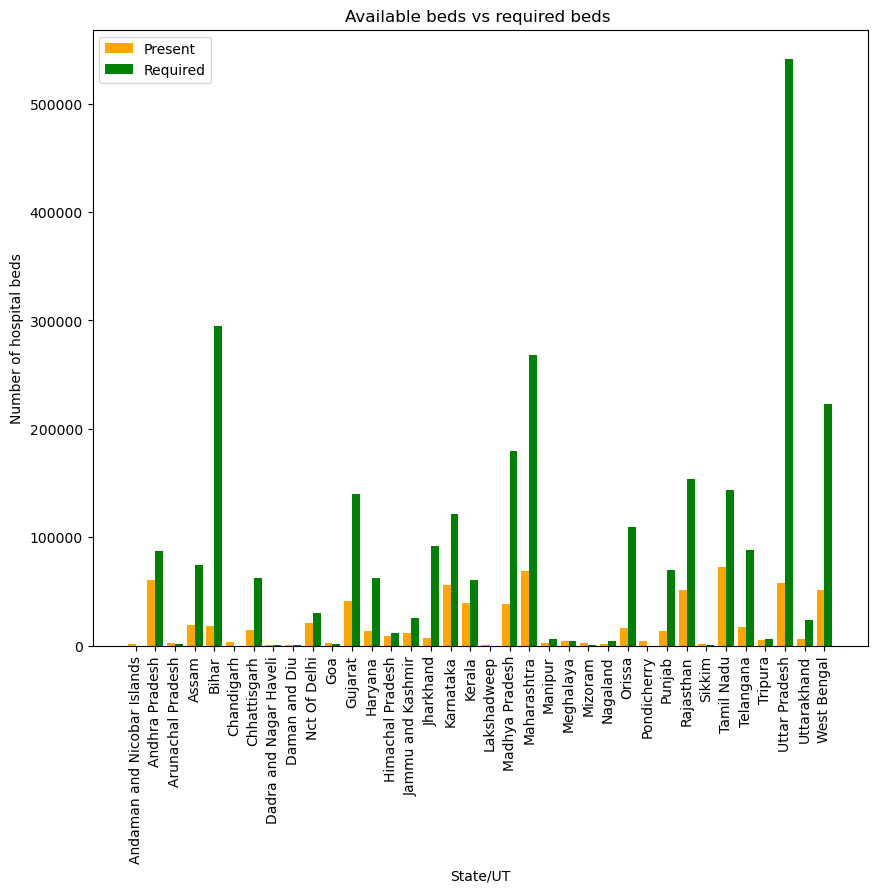

In [42]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
expected_beds = hos_with_pop["New_beds_required_per_pop"]
Present_beds = hos_with_pop["HospitalBeds"]
states = hos_with_pop["State/UT"]
x_vals = np.arange(len(states))
plt.bar(x_vals - 0.2, Present_beds,color='orange', label="Present",width=0.4)
plt.bar(x_vals + 0.2, expected_beds,color="green",label="Required",width=0.4)
plt.xticks(x_vals, states, rotation=90)
plt.xlabel("State/UT")
plt.ylabel("Number of hospital beds")
plt.title("Available beds vs required beds ")
plt.legend()
# plt.yticks(np.arange(round(min(Present_beds)),round(max(expected_beds)),100000))

plt.show()

### Problem Statement 17: (Hospitals required to meet the standards)
In a hypothetical situation if the government wishes to fill the gap between the available facility and the WHO standards all by itself how many government hospitals may be required in each state or union territory as well as at the national level?

Find the average number of beds in a government hospital. Divide it by the gap in the number of beds to reach the standards in the region, and round the number to the nearest integer to find the value.

Represent the findings visually.



In [43]:
govt_hosp=pd.read_csv('clean_data/government_hospitals.csv')
govt_hosp.head()

,States/UTs,Rural_Government_Hospitals,Rural_Government_Beds,Urban_Government_Hospitals,Urban_Government_Beds,Last_Updated
0,Andhra Pradesh,193,6480,65,16658,2017-01-01
1,Arunachal Pradesh,208,2136,10,268,2017-12-31
2,Assam,1176,10944,50,6198,2017-12-31
3,Bihar,930,6083,103,5936,2016-12-31
4,Chhattisgarh,169,5070,45,4342,2016-01-01


In [44]:
govt_hosp.head()

,States/UTs,Rural_Government_Hospitals,Rural_Government_Beds,Urban_Government_Hospitals,Urban_Government_Beds,Last_Updated
0,Andhra Pradesh,193,6480,65,16658,2017-01-01
1,Arunachal Pradesh,208,2136,10,268,2017-12-31
2,Assam,1176,10944,50,6198,2017-12-31
3,Bihar,930,6083,103,5936,2016-12-31
4,Chhattisgarh,169,5070,45,4342,2016-01-01


In [45]:
#hospital_required = hos_with_pop[["State/UT","New_beds_required_per_pop"]].merge(govt_hosp,on="State/UTs",how="inner")
hospital_required = pd.merge(hos_with_pop[["State/UT","New_beds_required_per_pop"]],govt_hosp,left_on="State/UT",right_on="States/UTs")
hospital_required.head()

,State/UT,New_beds_required_per_pop,States/UTs,Rural_Government_Hospitals,Rural_Government_Beds,Urban_Government_Hospitals,Urban_Government_Beds,Last_Updated
0,Andaman and Nicobar Islands,0.000,Andaman and Nicobar Islands,27,575,3,500,2016-12-31
1,Andhra Pradesh,87361.397,Andhra Pradesh,193,6480,65,16658,2017-01-01
2,Arunachal Pradesh,1831.181,Arunachal Pradesh,208,2136,10,268,2017-12-31
3,Assam,74501.728,Assam,1176,10944,50,6198,2017-12-31
4,Bihar,294502.356,Bihar,930,6083,103,5936,2016-12-31


In [46]:
hospital_required["Total_Government_Beds"] = hospital_required["Rural_Government_Beds"] + hospital_required["Urban_Government_Beds"]
hospital_required["Total_Government_Hospitals"] = hospital_required["Rural_Government_Hospitals"] + hospital_required["Urban_Government_Hospitals"]
hospital_required.head()

,State/UT,New_beds_required_per_pop,States/UTs,Rural_Government_Hospitals,Rural_Government_Beds,Urban_Government_Hospitals,Urban_Government_Beds,Last_Updated,Total_Government_Beds,Total_Government_Hospitals
0,Andaman and Nicobar Islands,0.000,Andaman and Nicobar Islands,27,575,3,500,2016-12-31,1075,30
1,Andhra Pradesh,87361.397,Andhra Pradesh,193,6480,65,16658,2017-01-01,23138,258
2,Arunachal Pradesh,1831.181,Arunachal Pradesh,208,2136,10,268,2017-12-31,2404,218
3,Assam,74501.728,Assam,1176,10944,50,6198,2017-12-31,17142,1226
4,Bihar,294502.356,Bihar,930,6083,103,5936,2016-12-31,12019,1033


In [47]:
hospital_required['Average_Beds_in_each_Hospital']=hospital_required['Total_Government_Beds']/hospital_required['Total_Government_Hospitals']
hospital_required.head()

,State/UT,New_beds_required_per_pop,States/UTs,Rural_Government_Hospitals,Rural_Government_Beds,Urban_Government_Hospitals,Urban_Government_Beds,Last_Updated,Total_Government_Beds,Total_Government_Hospitals,Average_Beds_in_each_Hospital
0,Andaman and Nicobar Islands,0.000,Andaman and Nicobar Islands,27,575,3,500,2016-12-31,1075,30,35.833333
1,Andhra Pradesh,87361.397,Andhra Pradesh,193,6480,65,16658,2017-01-01,23138,258,89.682171
2,Arunachal Pradesh,1831.181,Arunachal Pradesh,208,2136,10,268,2017-12-31,2404,218,11.027523
3,Assam,74501.728,Assam,1176,10944,50,6198,2017-12-31,17142,1226,13.982055
4,Bihar,294502.356,Bihar,930,6083,103,5936,2016-12-31,12019,1033,11.635044


In [48]:
hospital_required['Number_of_Hospitals_Required']=hospital_required['New_beds_required_per_pop']/hospital_required['Average_Beds_in_each_Hospital']
hospital_required.head()

,State/UT,New_beds_required_per_pop,States/UTs,Rural_Government_Hospitals,Rural_Government_Beds,Urban_Government_Hospitals,Urban_Government_Beds,Last_Updated,Total_Government_Beds,Total_Government_Hospitals,Average_Beds_in_each_Hospital,Number_of_Hospitals_Required
0,Andaman and Nicobar Islands,0.000,Andaman and Nicobar Islands,27,575,3,500,2016-12-31,1075,30,35.833333,0.000000
1,Andhra Pradesh,87361.397,Andhra Pradesh,193,6480,65,16658,2017-01-01,23138,258,89.682171,974.122242
2,Arunachal Pradesh,1831.181,Arunachal Pradesh,208,2136,10,268,2017-12-31,2404,218,11.027523,166.055515
3,Assam,74501.728,Assam,1176,10944,50,6198,2017-12-31,17142,1226,13.982055,5328.381667
4,Bihar,294502.356,Bihar,930,6083,103,5936,2016-12-31,12019,1033,11.635044,25311.667672


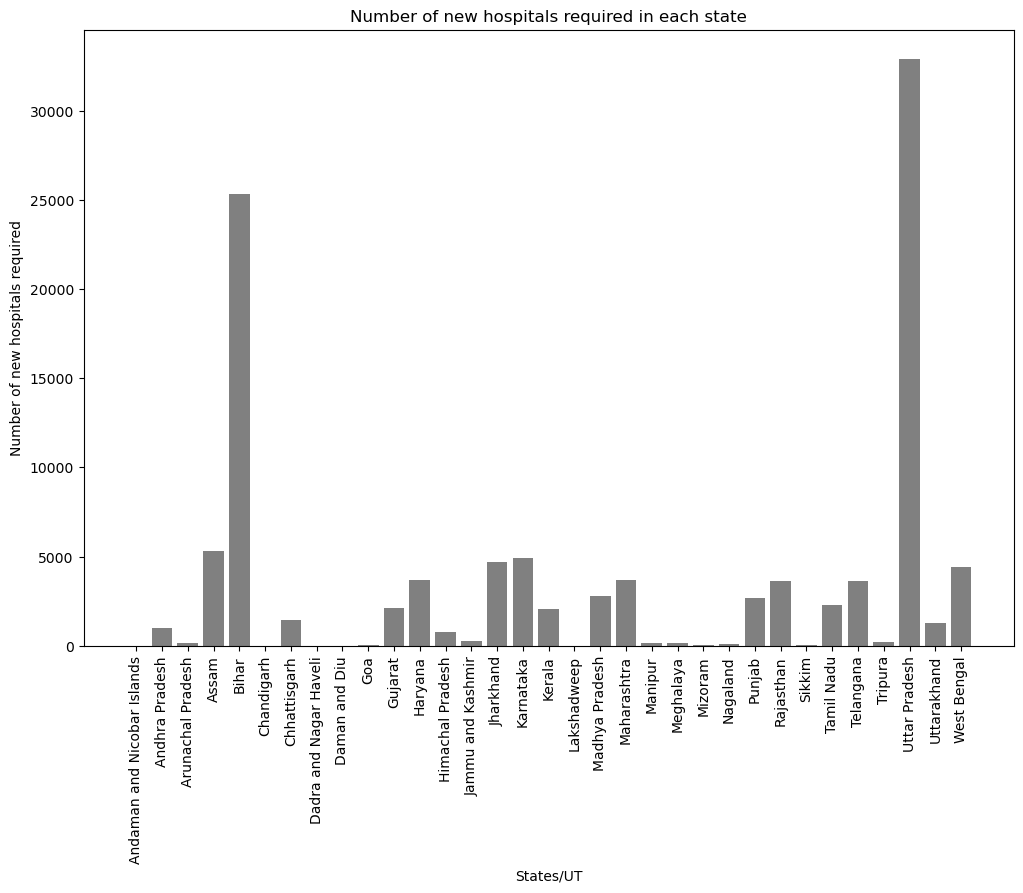

In [49]:
plt.figure(figsize=(12,8))
plt.bar(x=hospital_required['State/UT'], height=hospital_required['Number_of_Hospitals_Required'],color="grey")
plt.xlabel('States/UT')
plt.ylabel('Number of new hospitals required')
plt.title("Number of new hospitals required in each state")
plt.xticks(rotation=90)
plt.show()